In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# simulate linear data
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

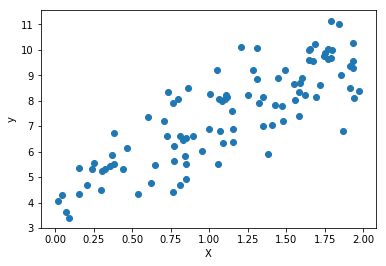

In [33]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y");

## Normal Equations

In [34]:
# computer theta for minimum cost using normal equations

X_b = np.c_[np.ones((100, 1)), X] # add X_0
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [35]:
theta_best

array([[ 4.30695657],
       [ 2.78296747]])

In [39]:
# predict using theta_best

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.30695657],
       [ 9.8728915 ]])

[0, 2, 0, 15]

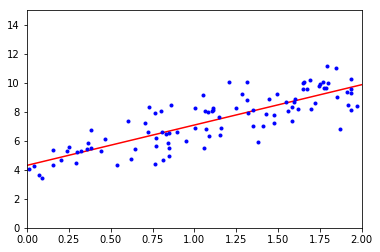

In [40]:
plt.plot(X_new , y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

In [42]:
# using sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.30695657]), array([[ 2.78296747]]))

In [43]:
lin_reg.predict(X_new)

array([[ 4.30695657],
       [ 9.8728915 ]])

## Batch Gradient Descent

In [44]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.rand(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [45]:
theta

array([[ 4.30695657],
       [ 2.78296747]])

## Stochastic Gradient Descent

In [66]:
n_epochs = 50
t0, t1 = 5, 50

eta_ = []
theta = np.random.randn(2,1)

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        Xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * Xi.T.dot(Xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        eta_.append(eta)
        theta = theta - eta * gradients

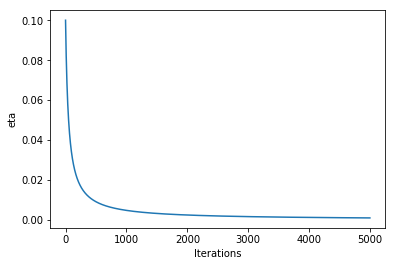

In [70]:
plt.plot(range(5000), eta_)
plt.xlabel("Iterations")
plt.ylabel("eta");

In [51]:
theta

array([[ 4.32800237],
       [ 2.73546987]])

In [63]:
# using sklearn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, tol=0.001, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=0.001, verbose=0,
       warm_start=False)

In [64]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.07690212]), array([ 2.89544719]))

## Polynomial Regression

In [72]:
m = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

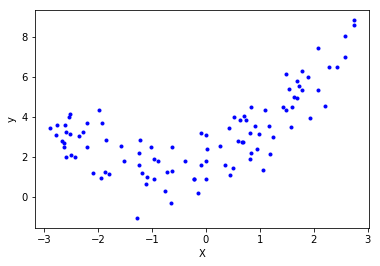

In [75]:
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y");

In [76]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([ 0.70321475,  0.49451099])

In [78]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 1.85533179]), array([[ 0.89746091,  0.53055901]]))

In [79]:
y_pred = lin_reg.predict(X_poly)

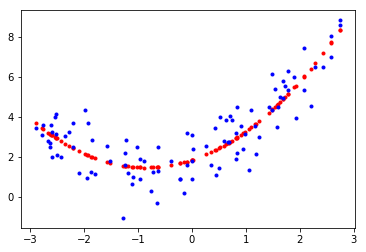

In [105]:
plt.plot(X, y_pred, "r.")
plt.plot(X, y, "b.")

## Learning Curves

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train_error = []
test_error = []

def plot_training_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        train_error.append(mean_squared_error(y_train[:m], model.predict(X_train[:m])))
        test_error.append(mean_squared_error(y_test, model.predict(X_test)))
    plt.plot(np.sqrt(train_error), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_error), "b-", label="test")


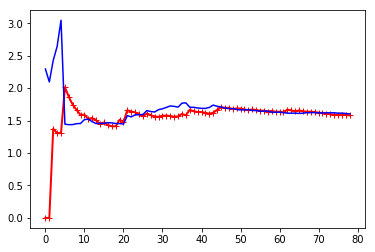

In [111]:
plot_training_curves(LinearRegression(), X, y)

In [113]:
# polynomial regression
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

(0, 5)

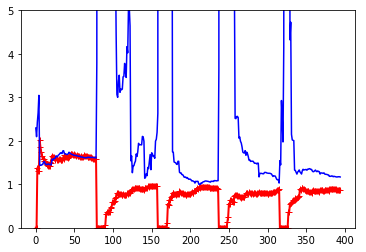

In [117]:
plot_training_curves(polynomial_regression, X, y)
plt.ylim(0,5)